<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/adp_23_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 23회
출처 : https://www.datamanim.com/dataset/ADPpb/00/p5.html

**답지 보지 않고 작업 수행**

## 1번
온, 습도, 조도, CO2농도에 따른 객실의 사용유무 판별

종속변수 : Occupance (0:비어있음, 1: 사용중)

데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv

In [13]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


### 1-1
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [14]:
print(df.info())
display(df.describe())
print('\n\n')
print('##### NULL CHECK #####')
display(df.isnull().sum())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000





##### NULL CHECK #####


date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


## 이상치 분석 ## 
CO2 null dates: ['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']


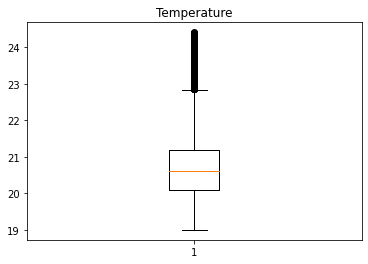

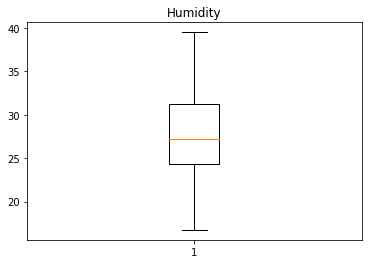

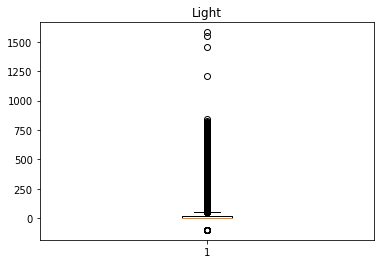

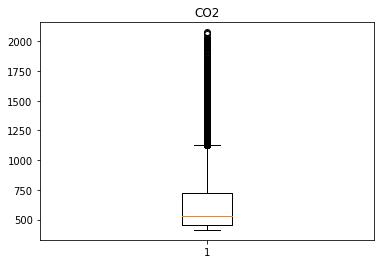

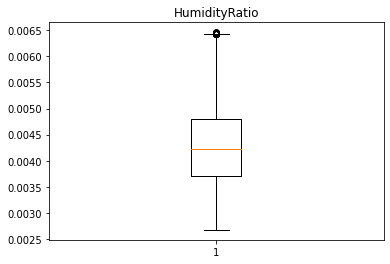

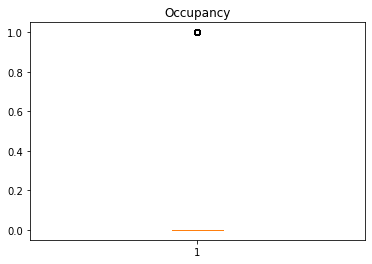

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.199284,0.625230,0.399370,0.138071,0.453281
Humidity,-0.199284,1.000000,-0.052119,0.254446,0.941568,0.032376
Light,0.625230,-0.052119,1.000000,0.354062,0.163272,0.867240
CO2,0.399370,0.254446,0.354062,1.000000,0.409735,0.409959
HumidityRatio,0.138071,0.941568,0.163272,0.409735,1.000000,0.198232
Occupancy,0.453281,0.032376,0.867240,0.409959,0.198232,1.000000


-99.0    50
Name: Light, dtype: int64

In [15]:
print('## 이상치 분석 ## ')

co2_nan_date = df[df.CO2.isnull()].date.values
print('CO2 null dates:', co2_nan_date)

import matplotlib.pyplot as plt
df_plot = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]
# df_plot.boxplot(column=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])

for col in ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'] :
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.show()


display(df_plot.corr())

display(df[df.Light < 0].Light.value_counts())

In [16]:
print('''
결측치가 일부 존재하며 date 컬럼을 제외하고 모두 float형식이다.

결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.

Humidity, HumidityRatio 두 컬럼은 높은 상관관계를 보이며, 

두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.

Light컬럼의 경우 -99인 값이 50개 존재한다.
''')


결측치가 일부 존재하며 date 컬럼을 제외하고 모두 float형식이다.

결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.

Humidity, HumidityRatio 두 컬럼은 높은 상관관계를 보이며, 

두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.

Light컬럼의 경우 -99인 값이 50개 존재한다.



In [17]:
# print('before type:', type(df['date']))
df['date'] = pd.to_datetime(df['date'])
# print('after type:', type(df['date']))
timedeltas = df['date'].diff().dt.seconds.dropna()
display(timedeltas.describe())
print('시간:', 25680/60/60)
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간차이를 가지고 있다.
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.
''')

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64

시간: 7.133333333333334

75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간차이를 가지고 있다.
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.



### 1-2
결측치를 대체하는 방식 선택하고 근거제시, 대체 수

In [18]:
print('''
CO2 컬럼에 nan 값으로 비어 있는 데이터는 직전, 직후 데이터를 비교해서 
Occupancy값이 변하지 않거나, date값이 3분 이내로 연속하는 데이터라고
한다면 직전 CO2 값으로 대체한다. 
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 데이터의 
품질을 손상시키지 않는다고 판단할 수 있다.
''')

for value in df[df.CO2.isnull()].index :
    target = df.iloc[value-1: value+2] # nan 값 전, 후 값을 target으로 가져오기
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() == 1 and len(difftime[difftime > 180]) == 0 :
        df.loc[value, 'CO2'] = df.loc[value-1].CO2

display(df.isnull().sum())

difftime = df['date'].diff().dt.seconds.dropna()
print('type:', type(difftime))
print('Count:', difftime[difftime >180].count)
difftime
print('Nunique:', df.Occupancy.nunique(), ', value_counts:', df.Occupancy.value_counts())


CO2 컬럼에 nan 값으로 비어 있는 데이터는 직전, 직후 데이터를 비교해서 
Occupancy값이 변하지 않거나, date값이 3분 이내로 연속하는 데이터라고
한다면 직전 CO2 값으로 대체한다. 
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 데이터의 
품질을 손상시키지 않는다고 판단할 수 있다.



date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

type: <class 'pandas.core.series.Series'>
Count: <bound method Series.count of 14       360.0
23       721.0
27       241.0
28       240.0
36       240.0
         ...  
16993    239.0
16996    300.0
16997    240.0
16999    181.0
17907    300.0
Name: date, Length: 443, dtype: float64>
Nunique: 2 , value_counts: 0    15810
1     2100
Name: Occupancy, dtype: int64


### 1-3
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

In [19]:
print('''
Ligth 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다.
-99를 제외한 컬럼의 최솟값인 0으로 대체한다.
평균적으로 시간은 1분 간경의 데이터이다.
하지만 최대 7시간의 공백이 존재한다. 이를 보간 해주는 것도 방법일 수 있지만,
시계열 모델을 사용하지 않을 것이기에 보간을 따로 해주지 않고 모델링을 진행한다.
''')
print(len(df[df.Light == -99].Light))

df.loc[df.Light == -99, 'Light'] = 0


Ligth 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다.
-99를 제외한 컬럼의 최솟값인 0으로 대체한다.
평균적으로 시간은 1분 간경의 데이터이다.
하지만 최대 7시간의 공백이 존재한다. 이를 보간 해주는 것도 방법일 수 있지만,
시계열 모델을 사용하지 않을 것이기에 보간을 따로 해주지 않고 모델링을 진행한다.

50


### 2-1
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성
(덧. 조: 데이터 불균형 여부 확인을 위한 그래프 그려라)

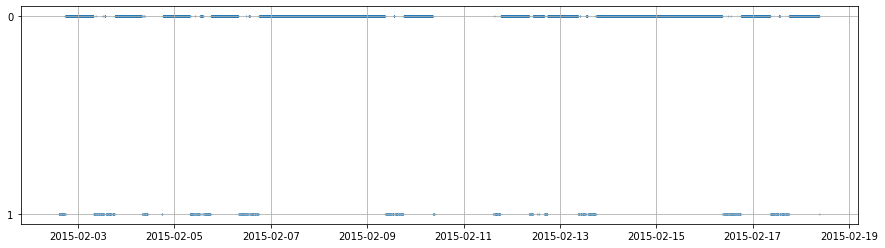

=== Occupancy 데이터 종류별 갯수 ===
0    0.882747
1    0.117253
Name: Occupancy, dtype: float64
0    15810
1     2100
Name: Occupancy, dtype: int64

Occupancy 의 경우 약 8:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다



In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.scatter(df['date'], df['Occupancy'].astype('str'), s=0.1)
plt.grid(which='both')
plt.show()

print('=== Occupancy 데이터 종류별 갯수 ===')
print(df.Occupancy.value_counts() / len(df.Occupancy))
print(df.Occupancy.value_counts())

print('''
Occupancy 의 경우 약 8:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다
''')

### 2-2
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시


In [21]:
print('''
**랜덤오버샘플링**
소수 클래스 데이터를 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
장점 : 데이터 불균형 문제 해결
단점 : 종속변수에 대한 고려없이 중복 생성, 오버피팅의 가능성이 존재

**SMOTE**
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소소 클래스 데이터 중
무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
장점 : 데이터 불균형 문제 해결, 분포를 고려한 중복없는 데이터 생성
단점 : 고차원 데이터에는 문제가 발생할 수 있다.
''')


**랜덤오버샘플링**
소수 클래스 데이터를 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
장점 : 데이터 불균형 문제 해결
단점 : 종속변수에 대한 고려없이 중복 생성, 오버피팅의 가능성이 존재

**SMOTE**
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소소 클래스 데이터 중
무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
장점 : 데이터 불균형 문제 해결, 분포를 고려한 중복없는 데이터 생성
단점 : 고차원 데이터에는 문제가 발생할 수 있다.



이미지 출처 : https://blog.linewalks.com/archives/7772


**RANDOM OVER SAMPLING**

![randomoversampling](https://blog.linewalks.com/wp-content/uploads/2021/12/random_over_sampling.gif)




**SMOTE**


![smote](https://blog.linewalks.com/wp-content/uploads/2021/12/smote_upgrade.gif)









### 2-3
오버 샘플링 수행 및 결과, 잘 되었다는 것을 판단해라.

['ADASYN', 'BorderlineSMOTE', 'KMeansSMOTE', 'RandomOverSampler', 'SMOTE', 'SMOTEN', 'SMOTENC', 'SVMSMOTE', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adasyn', '_random_over_sampler', '_smote', 'base']
print date: 1456    2015-02-03 22:02:59
2021    2015-02-04 07:27:59
11229   2015-02-13 02:51:59
12489   2015-02-14 04:31:00
1432    2015-02-03 21:39:00
Name: date, dtype: datetime64[ns]
print date with VIEW: 1456     1423000979000000000
2021     1423034879000000000
11229    1423795919000000000
12489    1423888260000000000
1432     1422999540000000000
Name: date, dtype: int64
before sampling shape x: (11641, 6)
before sampling shape y: (11641,)
after sampling shape x: (20552, 6)
after sampling shape y: (20552,)


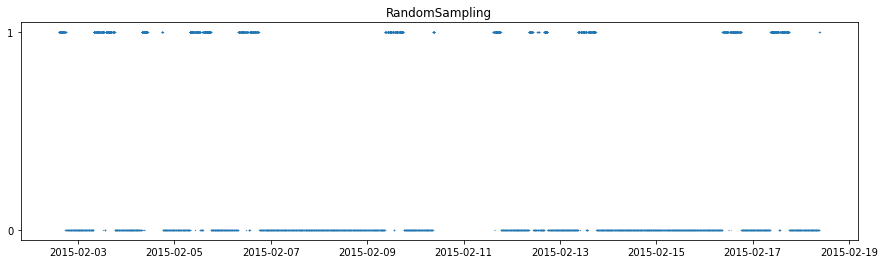

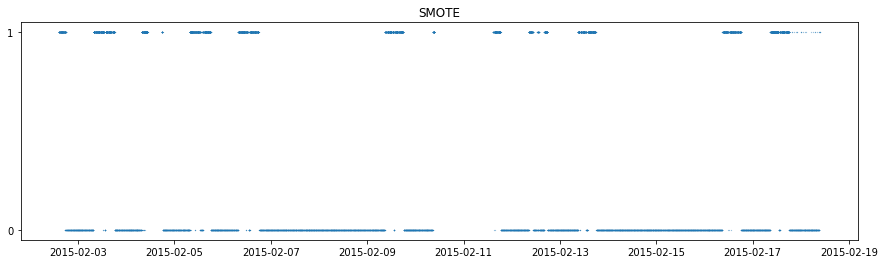


RandomOverSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼 수 있다. (2월 18일 부근)



In [22]:
from sklearn.model_selection import train_test_split
# import warnings

x = df.drop(columns=['Occupancy'])
y = df['Occupancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=43, test_size=0.35)


from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn import over_sampling as oversamp
print(dir(oversamp))

print('print date:', x_train['date'][:5])
print('print date with VIEW:', x_train['date'].view('int')[:5])
# datetime 형태로는 샘플링 할 수 없기에 timestamp 형식으로 바꿔서 샘플링을 진행한다.
x_train.loc[:, 'datetime'] = x_train['date'].view('int')  # 10**9 view: 해당 타입으로 형변환
x_test.loc[:, 'datetime'] = x_test['date'].view('int') # 10**9

from sklearn.preprocessing import StandardScaler

x_imb = x_train.drop(columns=['date']).reset_index(drop=True).copy()
y_imb = y_train.reset_index(drop=True).copy()

print('before sampling shape x:', x_imb.shape)
print('before sampling shape y:', y_imb.shape)
x_samp, y_samp = RandomOverSampler(random_state=2022).fit_resample(x_imb, y_imb)
print('after sampling shape x:', x_samp.shape)
print('after sampling shape y:', y_samp.shape)

total = pd.concat([x_samp, y_samp], axis=1)
# total['date'] = pd.to_datetime(total['datetime'], unit='s')
total['date'] = pd.to_datetime(total['datetime'])

smote_x_samp, smote_y_samp = SMOTE(random_state=2022).fit_resample(x_imb, y_imb)
smote_total = pd.concat([smote_x_samp, smote_y_samp], axis=1)
smote_total['date'] = pd.to_datetime(smote_total['datetime'])


plt.figure(figsize=(15, 4))
plt.title('RandomSampling')
plt.scatter(total['date'], total['Occupancy'].astype('str'), s=0.03)
plt.show()

plt.figure(figsize=(15, 4))
plt.title('SMOTE')
plt.scatter(smote_total['date'], smote_total['Occupancy'].astype('str'), s=0.03)
plt.show()

print('''
RandomOverSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼 수 있다. (2월 18일 부근)
''')




### 3-1
속도 측면, 정확도 측면 모델 1개씩 선택, 선택 이유도 기술

In [23]:
print('''
이진 분류에 관한 문제이다.
로지스틱 회귀와 램덤포레스트 모델로 작업을 진행하겠다.
속도측면 : LogisticRegression
정확도측면 : RandomForestClassifier
''')


이진 분류에 관한 문제이다.
로지스틱 회귀와 램덤포레스트 모델로 작업을 진행하겠다.
속도측면 : LogisticRegression
정확도측면 : RandomForestClassifier



### 3-2
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

In [26]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

# 불필요 컬럼 제거 및 스케일링
if 'date' in x_train.columns :
    x_train = x_train.drop(columns=['date'])
if 'date' in x_test.columns :
    x_test = x_test.drop(columns=['date'])

result_auc_train = []
result_auc_test = []
result_time = []

for train_x, train_y in [(x_train, y_train), (x_samp, y_samp), (smote_x_samp, smote_y_samp)] :
    trainx = train_x.copy()
    testx = x_test.copy()
    sc = MinMaxScaler()
    trainx = sc.fit_transform(trainx)
    testx = sc.transform(testx)

    lrstart = time.time()
    lr = LogisticRegression()
    lr.fit(trainx, train_y)
    lrend = time.time() - lrstart

    pred_lr = lr.predict(testx)
    auc_lr_train = roc_auc_score(train_y, lr.predict(trainx))
    auc_lr = roc_auc_score(y_test, pred_lr)

    rfstart = time.time()
    rf = RandomForestClassifier()
    rf.fit(trainx, train_y)
    rfend = time.time() - rfstart

    pred_rf = rf.predict(testx)
    auc_rf_train = roc_auc_score(train_y, rf.predict(trainx))
    auc_rf = roc_auc_score(y_test, pred_rf)

    result_auc_test.append([auc_lr, auc_rf])
    result_time.append([lrend, rfend])
    result_auc_train.append([auc_lr_train, auc_rf_train])

# LogisitcRegression 과 RandomForestClassifier 샘플링방식에 따른 학습 시 
# 정확도와 모델 학습 시간에 대해서 평가했다.

print('훈련셋 모델 auc 결과')
result_auc_train
    



훈련셋 모델 auc 결과


[[0.9870297731333154, 1.0],
 [0.9898793304787855, 1.0],
 [0.9908524717789023, 1.0]]